In [6]:
import matplotlib.pyplot as plt
import numpy as np
import logging
import sys
sys.path.insert(0,'..')
# import utils
#
import matplotlib
cm = 1/2.54  # centimeters in inches
plt.style.use('default')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['axes.xmargin'] = 0
#matplotlib.rcParams['axes.ymargin'] = 0
import pickle as pkl
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [3]:
with open(r"vars/logs_rl-tuned_1,05,5,2_5_laps.pickle", "rb") as handle:
    logs_rl_1 = pkl.load(handle)
with open(r"vars/logs_rl-tuned_with_constraints_1,05,5,2_5_laps.pickle", "rb") as handle:
    logs_rl_2 = pkl.load(handle)
with open(r"vars/logs_economic_5_laps.pickle", "rb") as handle:
    logs_eco = pkl.load(handle)

In [4]:
# Dictionary composed as
# iteration, X_log, U_log, delta, weights, theta, l(s,a)
steps_rl_1 = logs_rl_1[3][0]
X_log_rl_1 = logs_rl_1[3][1]
delta_rl_1 = np.array(logs_rl_1[3][3], dtype=float).flatten()
weights_rl_1 = np.array(logs_rl_1[3][4], dtype=float).reshape(-1,6)
theta_rl_1 = np.array(logs_rl_1[3][5], dtype=float).reshape(-1,4)
stage_cost_rl_1 = np.array(logs_rl_1[3][6], dtype=float).flatten()

steps_rl_2 = logs_rl_2[3][0]
X_log_rl_2 = logs_rl_2[3][1]
delta_rl_2 = np.array(logs_rl_2[3][3], dtype=float).flatten()
weights_rl_2 = np.array(logs_rl_2[3][4], dtype=float).reshape(-1,6)
theta_rl_2 = np.array(logs_rl_2[3][5], dtype=float).reshape(-1,4)
stage_cost_rl_2 = np.array(logs_rl_2[3][6], dtype=float).flatten()

steps_eco = logs_eco[3][0]
X_log_eco = logs_eco[3][1]
delta_eco = np.array(logs_eco[3][3], dtype=float).flatten()
weights_eco = np.array(logs_eco[3][4], dtype=float).reshape(-1,6)
theta_eco = np.array(logs_eco[3][5], dtype=float).reshape(-1,4)
stage_cost_eco = np.array(logs_eco[3][6], dtype=float).flatten()

C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ricca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

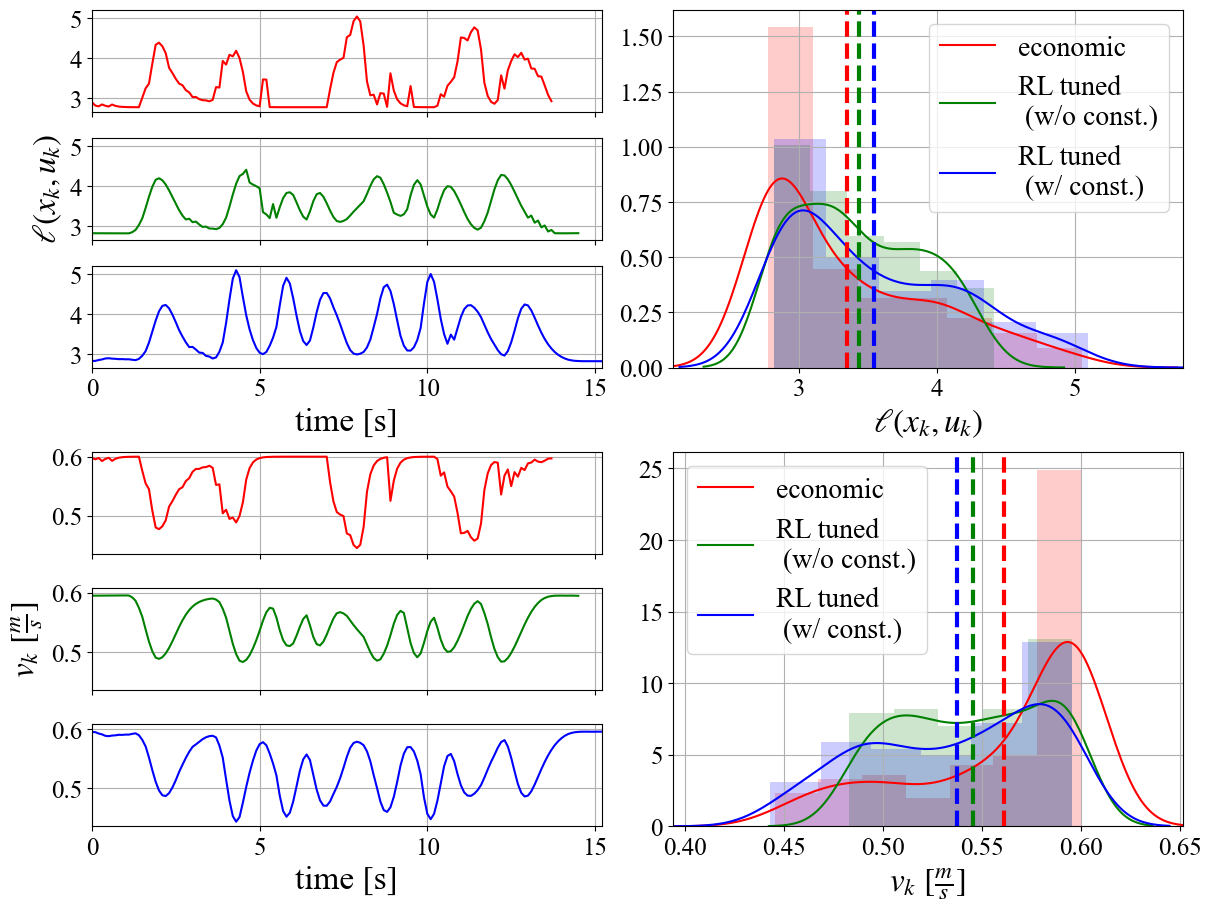

In [16]:
import seaborn as sns

fig, axs = plt.subplot_mosaic(
    """
    AB
    CB
    DB
    EF
    GF
    HF
    """,

    figsize=(12,9), dpi=100, constrained_layout=True)


sns.distplot(stage_cost_eco, ax=axs['B'], color='r', hist_kws=dict(alpha=.2), kde_kws=dict(label='economic'))
sns.distplot(stage_cost_rl_1, ax=axs['B'], color='g', hist_kws=dict(alpha=.2), kde_kws=dict(label='RL tuned\n (w/o const.)'))
sns.distplot(stage_cost_rl_2, ax=axs['B'], color='b', hist_kws=dict(alpha=.2), kde_kws=dict(label='RL tuned\n (w/ const.)'))
axs['B'].axvline(np.mean(stage_cost_eco), c='r', linestyle='--', lw=3)
axs['B'].axvline(np.mean(stage_cost_rl_1), c='g', linestyle='--', lw=3)
axs['B'].axvline(np.mean(stage_cost_rl_2), c='b', linestyle='--', lw=3)
axs['B'].set_ylabel('')
axs['B'].grid(True)
axs['B'].set_xlabel('$\ell(x_k,u_k)$')

axs['A'].sharex(axs['D'])
axs['A'].sharey(axs['D'])
axs['A'].plot((np.array(steps_eco) - steps_eco[0])*1/10, stage_cost_eco, color='r', label='economic')
axs['A'].grid(True)
axs['A'].tick_params(labelbottom=False)
#axs['A'].set_xlabel('time [s]')
#axs['A'].set_ylabel('$\ell(x_k,u_k)$')

axs['C'].sharex(axs['D'])
axs['C'].sharey(axs['D'])
axs['C'].plot((np.array(steps_rl_1) - steps_rl_1[0])*1/10, stage_cost_rl_1, color='g', label='RL tuned - w/o const.')
axs['C'].grid(True)
axs['C'].tick_params(labelbottom=False)
#axs['C'].set_xlabel('time [s]')
axs['C'].set_ylabel('$\ell(x_k,u_k)$')
#
axs['D'].plot((np.array(steps_rl_2) - steps_rl_2[0])*1/10, stage_cost_rl_2, color='b', label='RL tuned - w/ const.')
axs['D'].grid(True)
axs['D'].set_xlabel('time [s]')
#
axs['B'].legend(ncol=1, fontsize=20)

#
sns.distplot(X_log_eco[3,:], ax=axs['F'], color='r', hist_kws=dict(alpha=.2), kde_kws=dict(label='economic'))
sns.distplot(X_log_rl_1[3,:], ax=axs['F'], color='g', hist_kws=dict(alpha=.2), kde_kws=dict(label='RL tuned\n (w/o const.)'))
sns.distplot(X_log_rl_2[3,:], ax=axs['F'], color='b', hist_kws=dict(alpha=.2), kde_kws=dict(label='RL tuned\n (w/ const.)'))
axs['F'].axvline(np.mean(X_log_eco[3,:]), c='r', linestyle='--', lw=3)
axs['F'].axvline(np.mean(X_log_rl_1[3,:]), c='g', linestyle='--', lw=3)
axs['F'].axvline(np.mean(X_log_rl_2[3,:]), c='b', linestyle='--', lw=3)
axs['F'].set_ylabel('')
axs['F'].grid(True)
axs['F'].set_xlabel(r'$v_k\ [\frac{m}{s}]$')
             
axs['F'].legend(ncol=1, fontsize=20)

axs['E'].sharex(axs['H'])
axs['E'].sharey(axs['H'])
axs['E'].plot((np.array(steps_eco) - steps_eco[0])*1/10, X_log_eco[3,:], color='r', label='economic')
axs['E'].grid(True)
axs['E'].tick_params(labelbottom=False)

axs['G'].sharex(axs['H'])
axs['G'].sharey(axs['H'])
axs['G'].plot((np.array(steps_rl_1) - steps_rl_1[0])*1/10, X_log_rl_1[3,:], color='g', label='RL tuned - w/o const.')
axs['G'].grid(True)
axs['G'].tick_params(labelbottom=False)
axs['G'].set_ylabel(r'$v_k\ [\frac{m}{s}]$')

axs['H'].plot((np.array(steps_rl_2) - steps_rl_2[0])*1/10, X_log_rl_2[3,:], color='b', label='RL tuned - w/ const.')
axs['H'].grid(True)
axs['H'].set_xlabel('time [s]')
#ax2.plot((np.array(steps_rl_2) - steps_rl_2[0])*1/10, X_log_rl_2[3,:], color='b', label='RL tuned - w/ const.')
#
#ax2.grid(True)
#ax2.set_xlabel('time [s]')
#ax2.set_ylabel('$v_k$ [m/s]')
#
#ax2.axhline(np.mean(X_log_eco[3,:]), c='r', linestyle='--', lw=3)
#ax2.fill_between((np.array(steps_eco) - steps_eco[0])*1/10, np.mean(X_log_eco[3,:])-np.std(X_log_eco[3,:]),np.mean(X_log_eco[3,:])+np.std(X_log_eco[3,:]), color='r', alpha=0.1)
#
#ax2.axhline(np.mean(X_log_rl_1[3,:]), c='g', linestyle='--', lw=3)
#ax2.fill_between((np.array(steps_rl_1) - steps_rl_1[0])*1/10, np.mean(X_log_rl_1[3,:])-np.std(X_log_rl_1[3,:]),np.mean(X_log_rl_1[3,:])+np.std(X_log_rl_1[3,:]), color='g', alpha=0.1)
#
#ax2.axhline(np.mean(X_log_rl_2[3,:]), c='b', linestyle='--', lw=3)
#ax2.fill_between((np.array(steps_rl_2) - steps_rl_2[0])*1/10, np.mean(X_log_rl_2[3,:])-np.std(X_log_rl_2[3,:]),np.mean(X_log_rl_2[3,:])+np.std(X_log_rl_2[3,:]), color='b', alpha=0.1)
#
##ax2.legend(ncol=2)
#handles, labels = ax2.get_legend_handles_labels()
#fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.95,0.55), fontsize=20)

#fig.subplots_adjust(wspace=0.01, hspace=1.5)
#plt.savefig('speed_comparison_2.png', format='png')
plt.show()

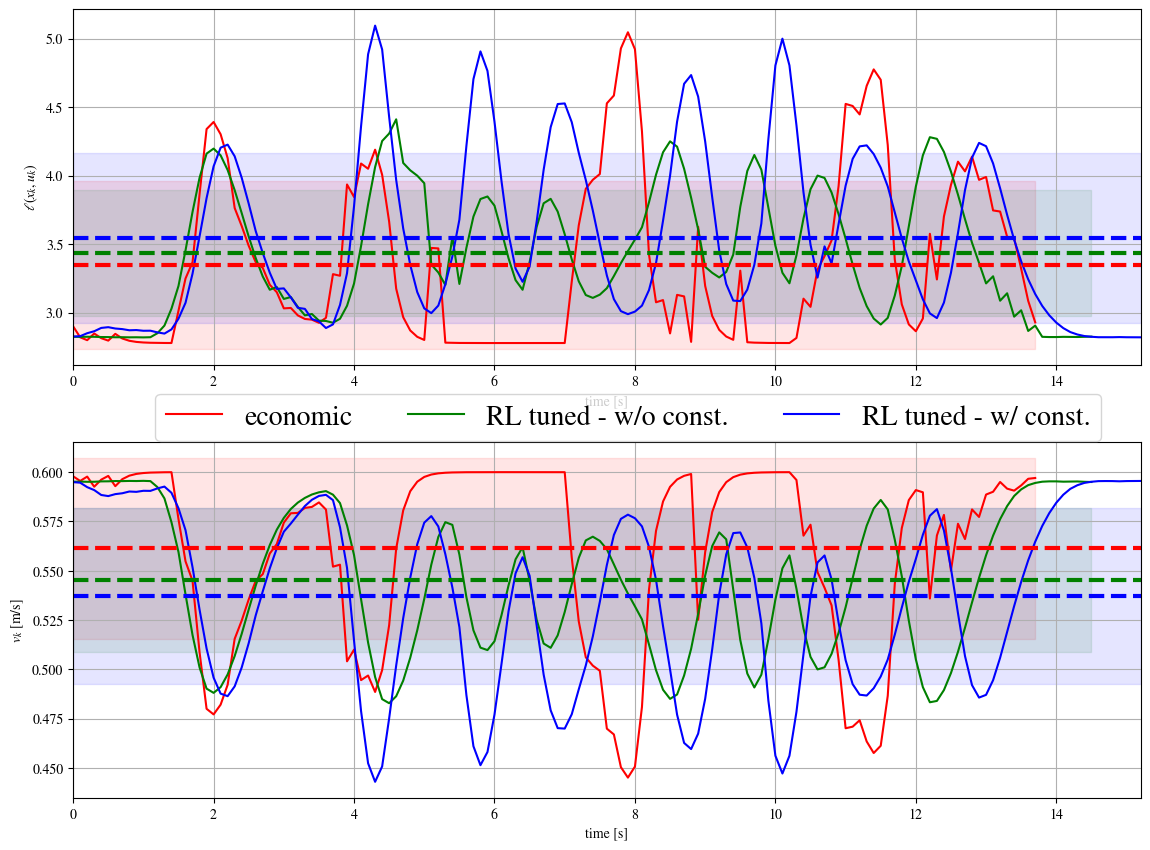

In [4]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,9), dpi=100)
ax1.plot((np.array(steps_eco) - steps_eco[0])*1/10, stage_cost_eco, color='r', label='economic')
ax1.grid(True)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('$\ell(x_k,u_k)$')

ax1.plot((np.array(steps_rl_1) - steps_rl_1[0])*1/10, stage_cost_rl_1, color='g', label='RL tuned - w/o const.')
ax1.grid(True)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('$\ell(x_k,u_k)$')

ax1.plot((np.array(steps_rl_2) - steps_rl_2[0])*1/10, stage_cost_rl_2, color='b', label='RL tuned - w/ const.')
ax1.grid(True)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('$\ell(x_k,u_k)$')

ax1.axhline(np.mean(stage_cost_eco), c='r', linestyle='--', lw=3)
ax1.fill_between((np.array(steps_eco) - steps_eco[0])*1/10, np.mean(stage_cost_eco)-np.std(stage_cost_eco),np.mean(stage_cost_eco)+np.std(stage_cost_eco), color='r', alpha=0.1)

ax1.axhline(np.mean(stage_cost_rl_1), c='g', linestyle='--', lw=3)
ax1.fill_between((np.array(steps_rl_1) - steps_rl_1[0])*1/10, np.mean(stage_cost_rl_1)-np.std(stage_cost_rl_1),np.mean(stage_cost_rl_1)+np.std(stage_cost_rl_1), color='g', alpha=0.1)

ax1.axhline(np.mean(stage_cost_rl_2), c='b', linestyle='--', lw=3)
ax1.fill_between((np.array(steps_rl_2) - steps_rl_2[0])*1/10, np.mean(stage_cost_rl_2)-np.std(stage_cost_rl_2),np.mean(stage_cost_rl_2)+np.std(stage_cost_rl_2), color='b', alpha=0.1)

#ax1.legend(ncol=3, fontsize=20)


ax2.plot((np.array(steps_eco) - steps_eco[0])*1/10, X_log_eco[3,:], color='r', label='economic')
ax2.plot((np.array(steps_rl_1) - steps_rl_1[0])*1/10, X_log_rl_1[3,:], color='g', label='RL tuned - w/o const.')
ax2.plot((np.array(steps_rl_2) - steps_rl_2[0])*1/10, X_log_rl_2[3,:], color='b', label='RL tuned - w/ const.')

ax2.grid(True)
ax2.set_xlabel('time [s]')
ax2.set_ylabel('$v_k$ [m/s]')

ax2.axhline(np.mean(X_log_eco[3,:]), c='r', linestyle='--', lw=3)
ax2.fill_between((np.array(steps_eco) - steps_eco[0])*1/10, np.mean(X_log_eco[3,:])-np.std(X_log_eco[3,:]),np.mean(X_log_eco[3,:])+np.std(X_log_eco[3,:]), color='r', alpha=0.1)

ax2.axhline(np.mean(X_log_rl_1[3,:]), c='g', linestyle='--', lw=3)
ax2.fill_between((np.array(steps_rl_1) - steps_rl_1[0])*1/10, np.mean(X_log_rl_1[3,:])-np.std(X_log_rl_1[3,:]),np.mean(X_log_rl_1[3,:])+np.std(X_log_rl_1[3,:]), color='g', alpha=0.1)

ax2.axhline(np.mean(X_log_rl_2[3,:]), c='b', linestyle='--', lw=3)
ax2.fill_between((np.array(steps_rl_2) - steps_rl_2[0])*1/10, np.mean(X_log_rl_2[3,:])-np.std(X_log_rl_2[3,:]),np.mean(X_log_rl_2[3,:])+np.std(X_log_rl_2[3,:]), color='b', alpha=0.1)

#ax2.legend(ncol=2)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.95,0.55), fontsize=20)

plt.tight_layout(pad=2.5)
#plt.savefig('comparison.png', format='png')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


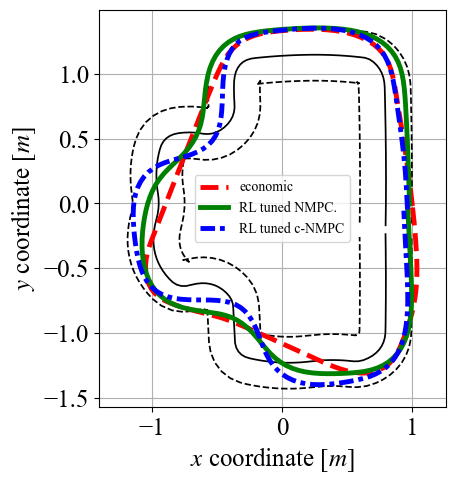

In [20]:
with open(r"vars/trajectory.pickle", "rb") as handle:
    traj = pkl.load(handle)
with open(r"vars/inside.pickle", "rb") as handle:
    inside = pkl.load(handle)
with open(r"vars/outside.pickle", "rb") as handle:
    outside = pkl.load(handle)

fig, ax = plt.subplots(1,1, figsize=(12*cm,12*cm), dpi=100, constrained_layout=True)
#fig, ax = plt.subplots(1,1, dpi=100, figsize=(12,9))
ax.plot(traj[:,0], traj[:,1], "k", lw=1.25)
ax.plot(inside[:,0], inside[:,1], "k--", lw=1.25)
ax.plot(outside[:,0], outside[:,1], "k--", lw=1.25)
#ax1.text(X_log[0,0], X_log[1,0], 'START')
ax.plot(X_log_eco[0,:],X_log_eco[1,:], c='r', label='economic', lw=3.5, ls='--')
ax.plot(X_log_rl_1[0,:],X_log_rl_1[1,:], c='g', label='RL tuned NMPC.', lw=3.5)
ax.plot(X_log_rl_2[0,:],X_log_rl_2[1,:], c='b', label='RL tuned c-NMPC', lw=3.5, ls=(0, (3, 1, 1, 1)))
                
ax.legend(fontsize=10)
ax.grid(True)
ax.margins(x=0.1)
ax.set_aspect('equal')
#plt.gca().set_aspect('equal')
ax.set_xlabel('$x$ coordinate [$m$]',fontsize=18)
ax.set_ylabel('$y$ coordinate [$m$]',fontsize=18)
plt.grid(True)
plt.savefig('1,05,5,2_tuned_laps.eps', format='eps')
plt.show()

In [61]:
(steps_rl[-1] - steps_rl[0])*1/10 - (steps_eco[-1] - steps_eco[0])*1/10

0.8000000000000007

In [152]:
np.mean(stage_cost_eco)
np.mean(stage_cost_rl_1)
np.mean(stage_cost_rl_2)
np.std(stage_cost_eco)
np.std(stage_cost_rl_1)
np.std(stage_cost_rl_2)
np.mean(X_log_eco[3,:])
np.mean(X_log_rl_1[3,:])
np.mean(X_log_rl_2[3,:])
np.std(X_log_eco[3,:])
np.std(X_log_rl_1[3,:])
np.std(X_log_rl_2[3,:])

0.04473830642507117

In [85]:
(np.std(X_log_rl[3,:]) - np.std(X_log_eco[3,:]))/np.std(X_log_eco[3,:])
#(np.std(stage_cost_rl) - np.std(stage_cost_eco))/np.std(stage_cost_eco)

-0.20077341052987835

In [74]:
40.27/15.17

2.654581410678972

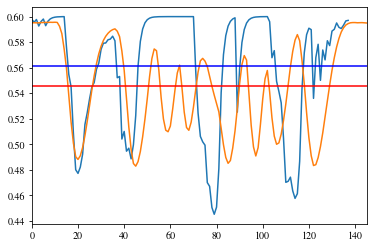

In [23]:
plt.plot(np.array(steps_eco) - steps_eco[0], X_log_eco[3,:])
plt.plot(np.array(steps_rl) - steps_rl[0], X_log_rl[3,:])
plt.axhline(np.mean(X_log_eco[3,:]), color='b')
plt.axhline(np.mean(X_log_rl[3,:]), color='r')

In [4]:
lap_labels = [1] + list(np.arange(5,70,5))
lap_values = []
steps = np.array([])
delta = np.array([])
X = np.array([[0, 0, 0, 0, 0]])
weights = np.array([[1, 0.5, 5, 0, 0, 2]])
theta = np.array([[0, 0, 0, 0]])

stage_cost = np.array([])
for key in logs.keys():
    if key in lap_labels:
        lap_values.append(np.array(logs[key][0], dtype=int).flatten()[-1])
    steps = np.concatenate((steps, np.array(logs[key][0], dtype=int).flatten()))
    X = np.concatenate((X, np.array(logs[key][1].T, dtype=float).reshape(-1,5)))
    delta = np.concatenate((delta, np.array(logs[key][3], dtype=float).flatten()))
    weights = np.concatenate((weights, np.array(logs[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta = np.concatenate((theta, np.array(logs[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost = np.concatenate((stage_cost, np.array(logs[key][6], dtype=int).flatten()))

/tmp/ipykernel_72920/1804865151.py:18: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  stage_cost = np.concatenate((stage_cost, np.array(logs[key][6], dtype=int).flatten()))


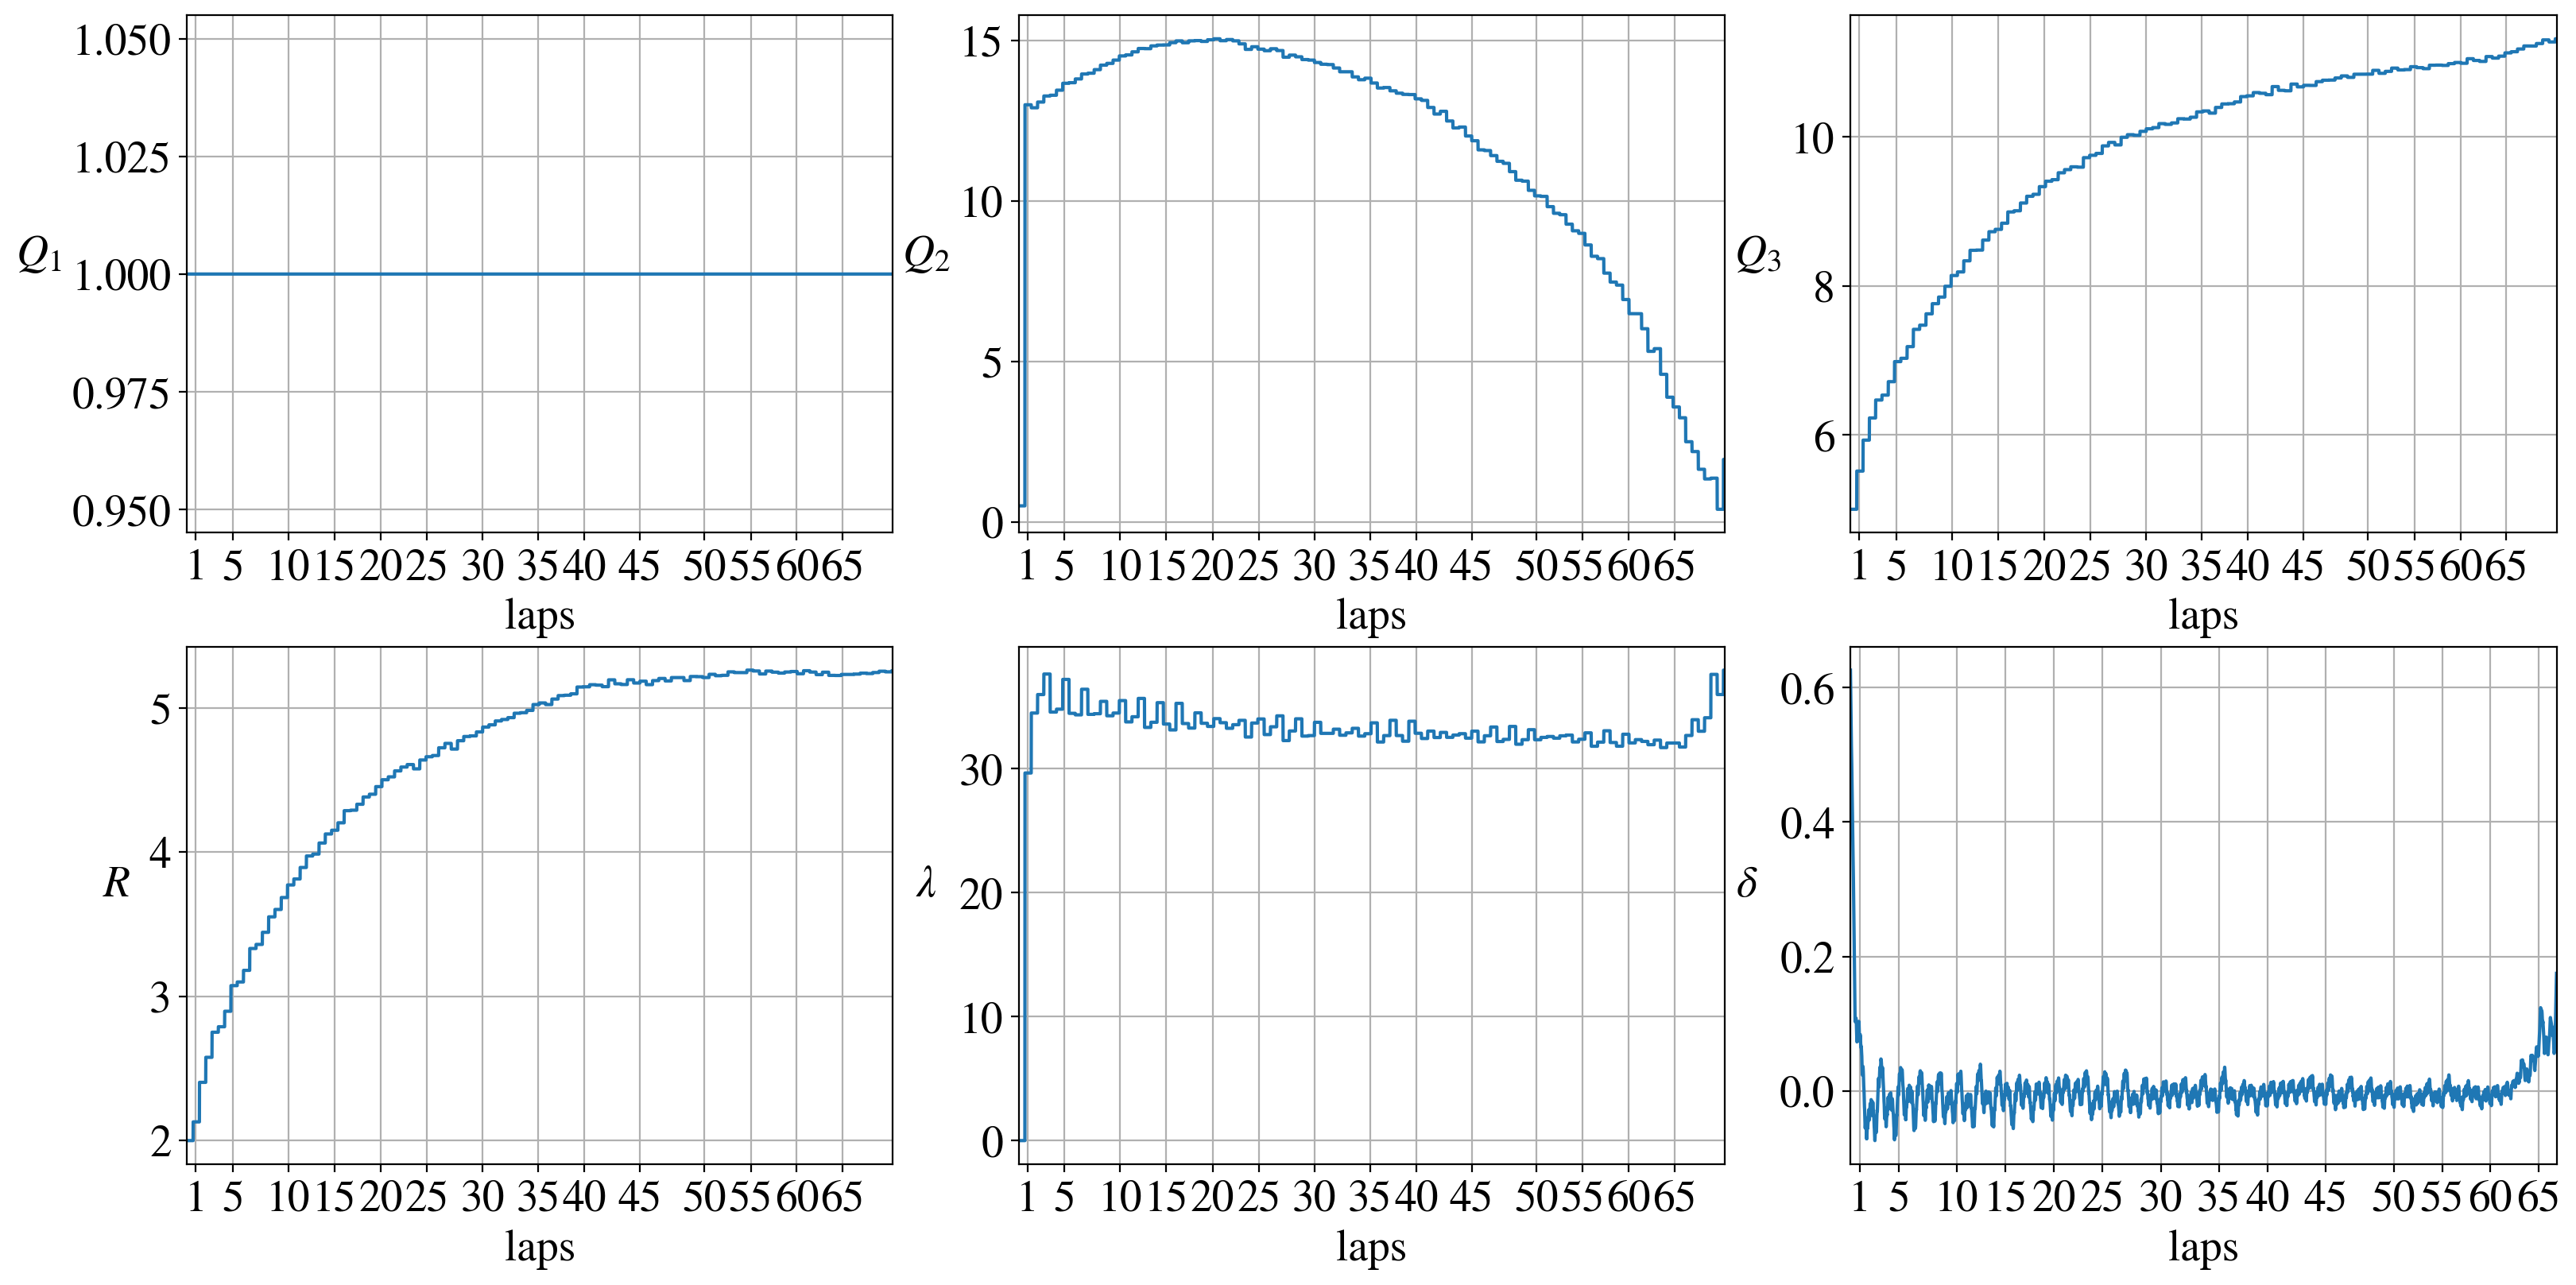

In [36]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,constrained_layout=False, figsize=(16, 8), dpi=200)
ax1.plot(weights[:,0], label='Q1')
#ax1.legend()
ax1.set_xlabel('laps')
ax1.set_ylabel('$Q_1$', rotation=0, labelpad=15, fontsize=20)
ax1.set_xticks(lap_values)
ax1.set_xticklabels(lap_labels)
ax1.grid(True)

ax2.plot(weights[:,1], label='Q2')
#ax2.legend()
ax2.set_xlabel('laps')
ax2.set_ylabel('$Q_2$', rotation=0, labelpad=15, fontsize=20)
ax2.set_xticks(lap_values)
ax2.set_xticklabels(lap_labels)
ax2.grid(True)

ax3.plot(weights[:,2], label='Q3')
#ax3.legend()
ax3.grid(True)
ax3.set_xlabel('laps')
ax3.set_ylabel('$Q_3$', rotation=0, labelpad=15, fontsize=20)
ax3.set_xticks(lap_values)
ax3.set_xticklabels(lap_labels)

ax4.plot(weights[:,5], label='R')
#ax4.legend()
ax4.grid(True)
ax4.set_xlabel('laps')
ax4.set_ylabel('$R$', rotation=0, labelpad=15, fontsize=20)
ax4.set_xticks(lap_values)
ax4.set_xticklabels(lap_labels)

ax5.plot(theta[:,0], label=r'$\lambda$')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,1], label=r'$\theta_{V,1}$')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,2], label=r'$\theta_{V,2}$')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,3], label=r'$\theta_{V,3}$')
#ax5.legend()
ax5.set_xlabel('laps')
ax5.set_ylabel(r'$\lambda$', rotation=0, labelpad=15, fontsize=20)
ax5.set_xticks(lap_values)
ax5.set_xticklabels(lap_labels)
ax5.grid(True)

ax6.plot(moving_average(delta[30:], 500), label='TD error')
#ax6.legend()
#ax2.plot(np.array(delta_vect).flatten())
ax6.grid(True)
ax6.set_xlabel('laps')
ax6.set_ylabel(r'$\delta$', rotation=0, labelpad=15, fontsize=20)
ax6.set_xticks(lap_values)
ax6.set_xticklabels(lap_labels)

plt.tight_layout(pad=0.2)
plt.savefig('1,05,5,2_training_params.eps', format='eps')
plt.show()

In [55]:
np.array(logs[65][4], dtype=float).reshape(-1,6)[-1]
np.array(logs[65][5], dtype=float).reshape(-1,4)[-1]

array([32.0790575,  0.       ,  0.       ,  0.       ])

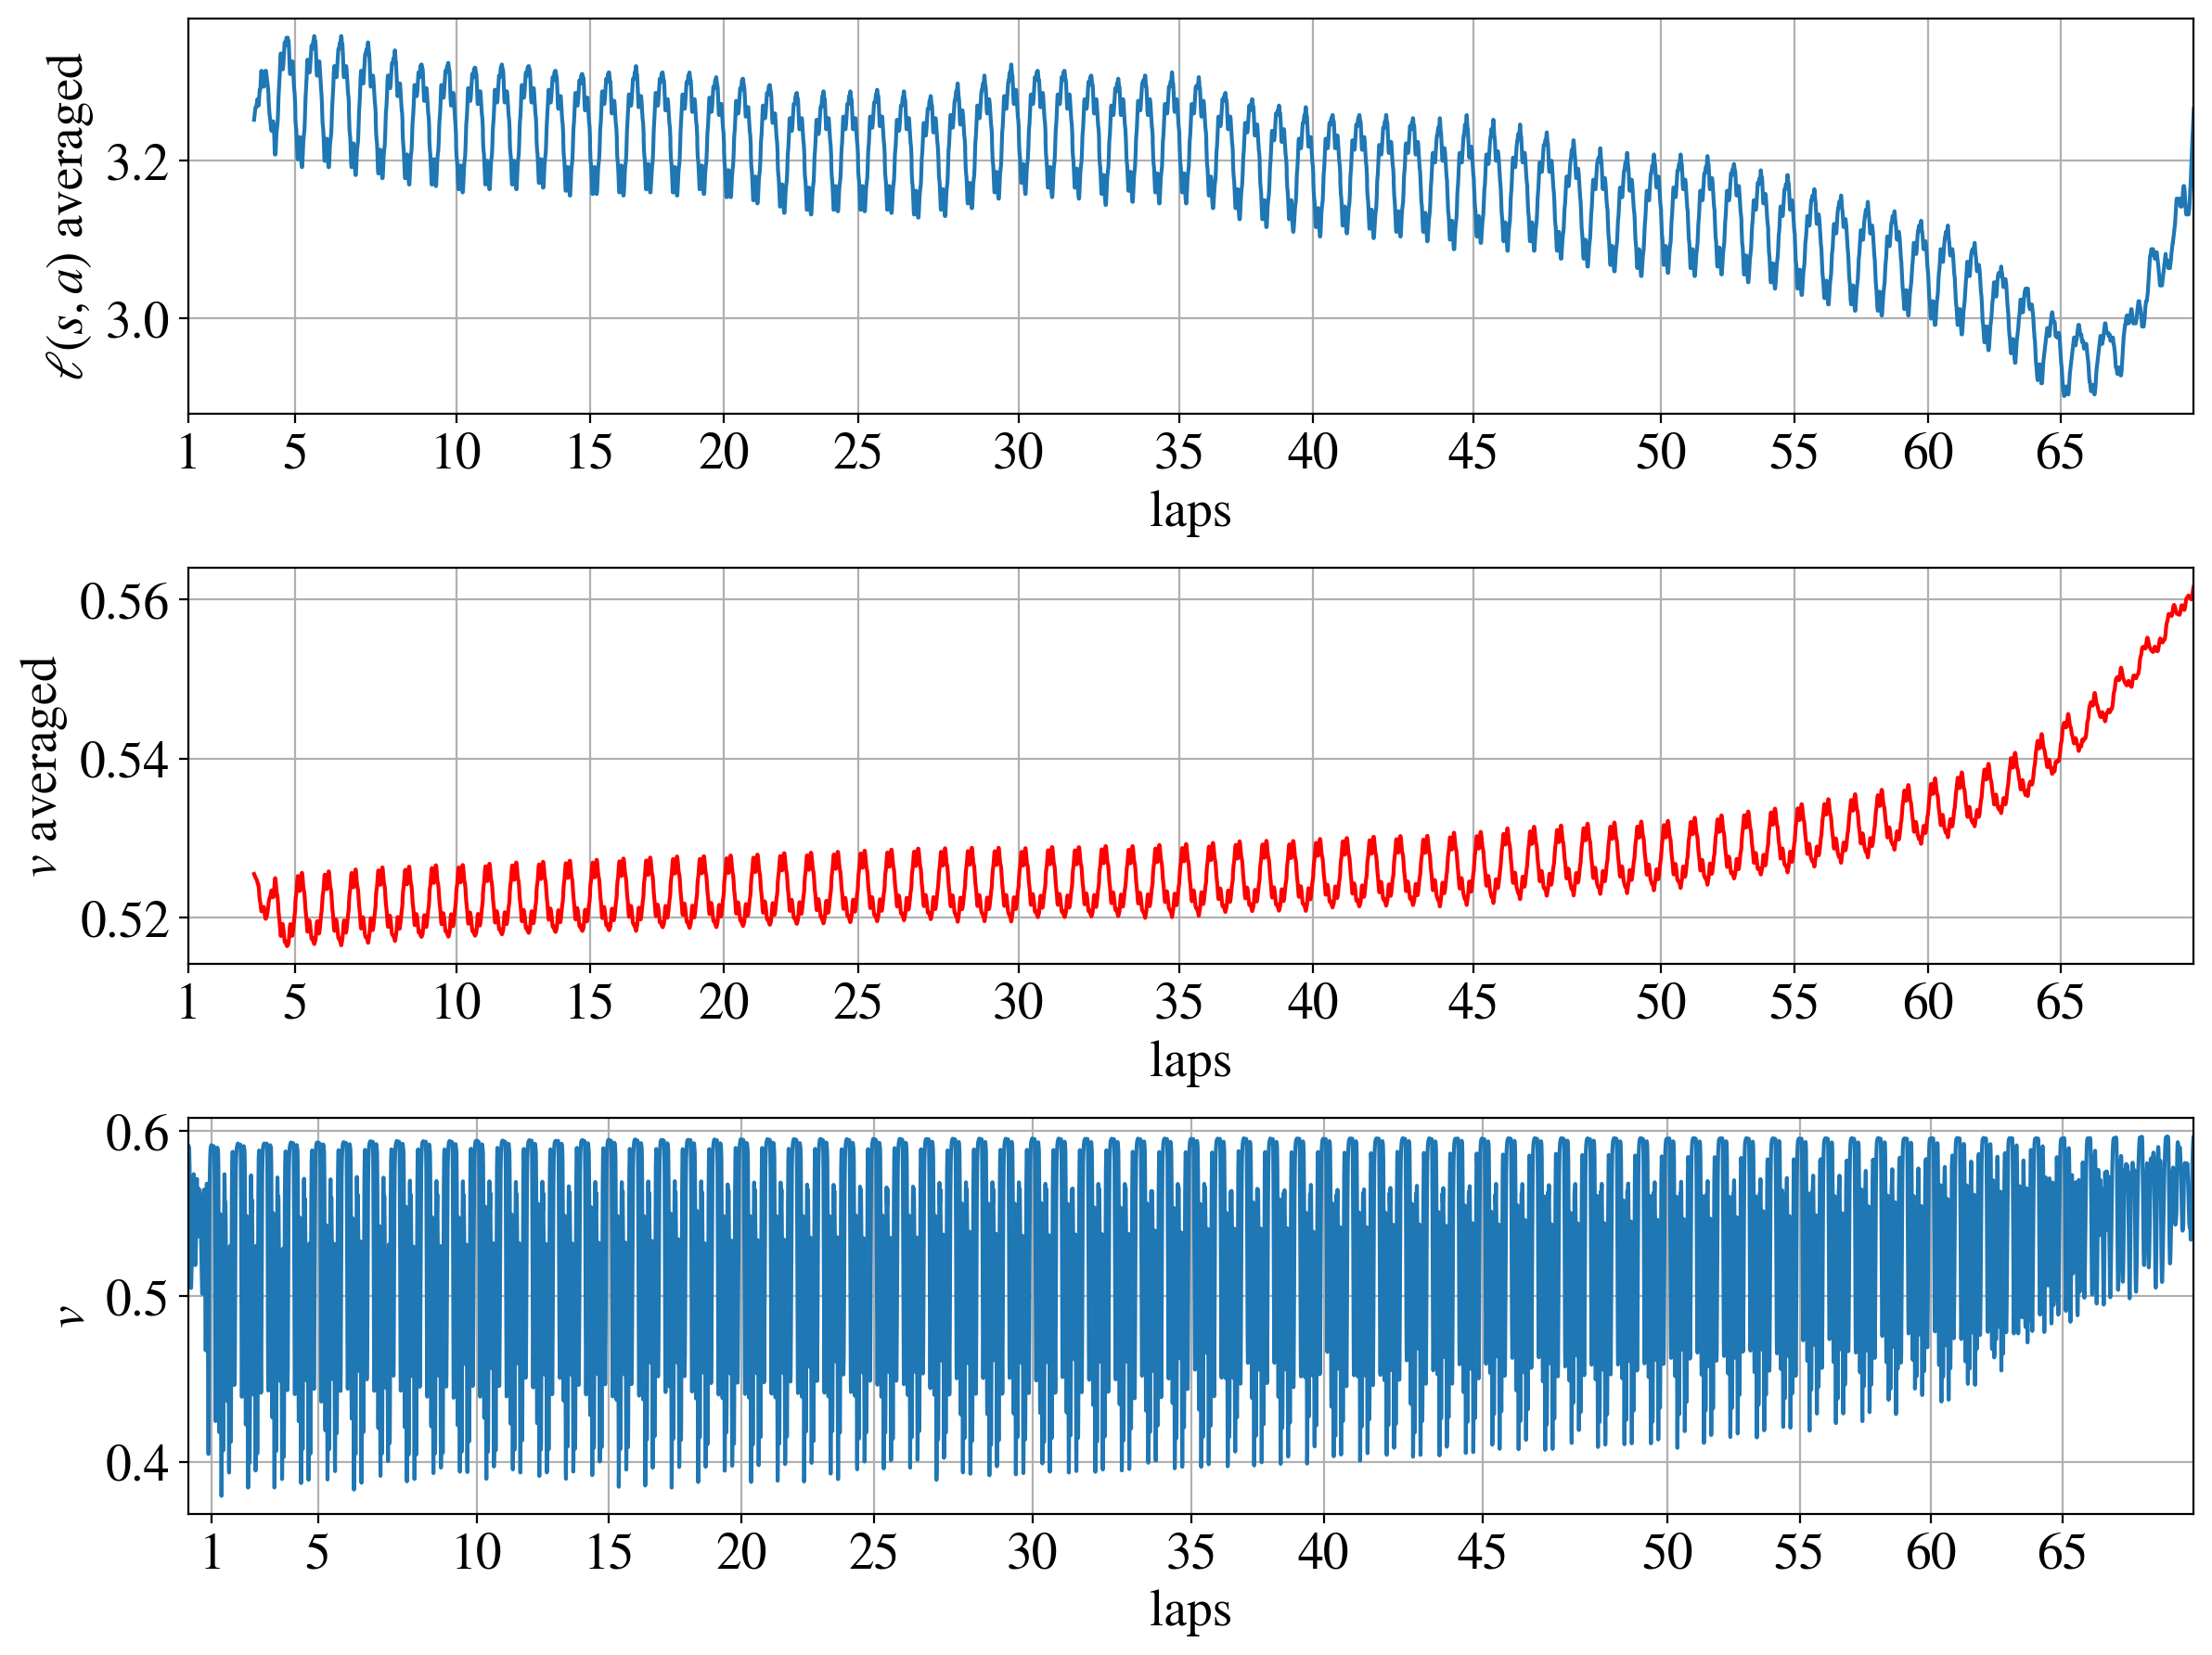

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,9), dpi=200)
ax1.plot(steps[509:], moving_average(np.array(stage_cost[10:]).flatten(), 500))
ax1.set_xticks(lap_values)
ax1.set_xticklabels(lap_labels)
ax1.grid(True)
ax1.set_xlabel('laps')
ax1.set_ylabel('$\ell(s,a)$ averaged')

ax2.plot(steps[509:], moving_average(X[11:,3], 500), c='r')
ax2.set_xticks(lap_values)
ax2.set_xticklabels(lap_labels)
ax2.grid(True)
ax2.set_xlabel('laps')
ax2.set_ylabel('$v$ averaged')


ax3.plot(steps[9:], X[10:,3])
ax3.set_xticks(lap_values)
ax3.set_xticklabels(lap_labels)
ax3.grid(True)
ax3.set_xlabel('laps')
ax3.set_ylabel('$v$')

plt.tight_layout(pad=0.5)
plt.savefig('1,05,5,2_training_speed.eps', format='eps')
plt.show()

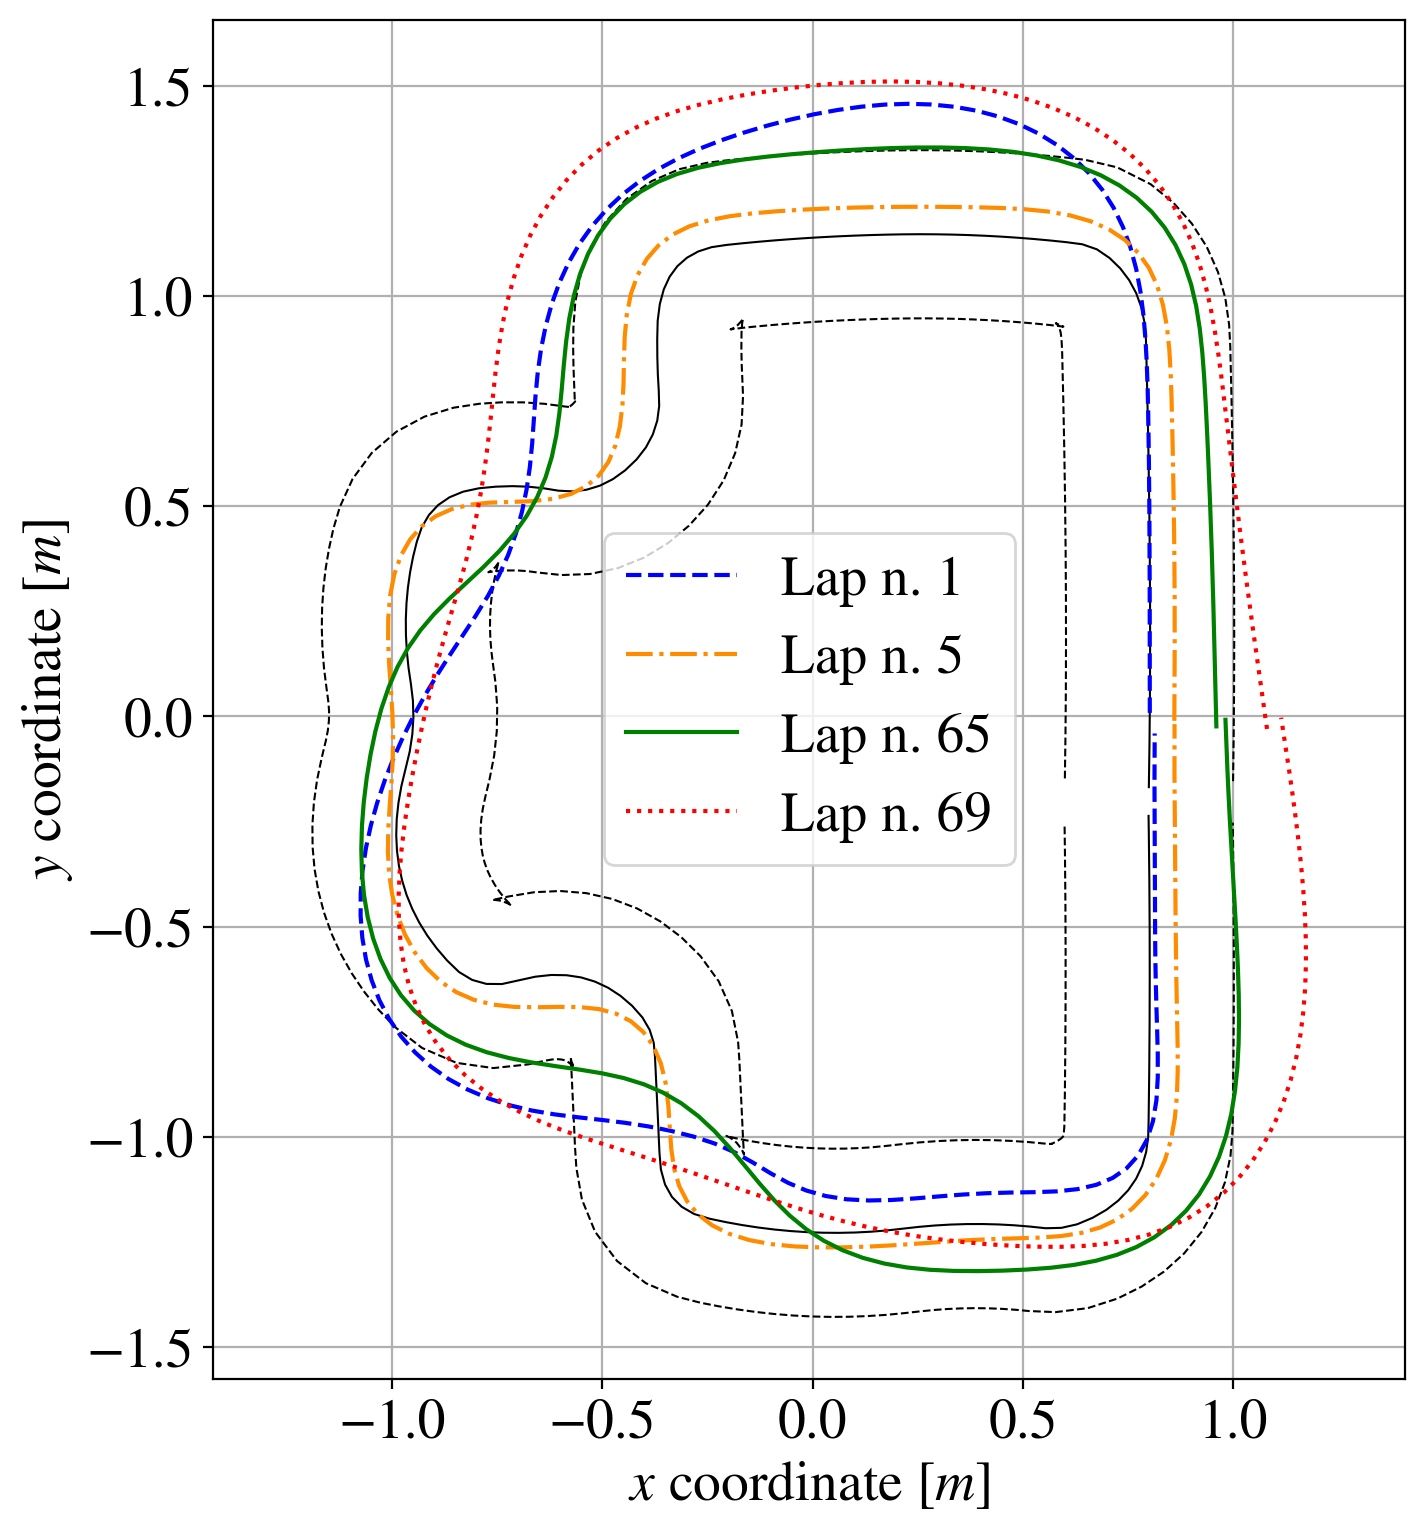

In [48]:
with open(r"vars/trajectory.pickle", "rb") as handle:
    traj = pkl.load(handle)
with open(r"vars/inside.pickle", "rb") as handle:
    inside = pkl.load(handle)
with open(r"vars/outside.pickle", "rb") as handle:
    outside = pkl.load(handle)
    
fig, (ax1, ax2) = plt.subplots(1,2, dpi=200, figsize=(12,9))
ax.plot(traj[:,0], traj[:,1], "k", lw=0.75)
ax.plot(inside[:,0], inside[:,1], "k--", lw=0.75)
ax.plot(outside[:,0], outside[:,1], "k--", lw=0.75)
#ax1.text(X_log[0,0], X_log[1,0], 'START')

for i, (key, val) in enumerate(logs.items()):
    #print(val[1].shape)
    #ax_dict["A"].plot(val[1][0,:], val[1][1,:], label='Lap n. %i'%(i+1))
    if i==0 or i==4 or i==64 or i==68:
        if i==0:
            c = 'b'
            linestyle = '--'
        elif i==4:
            c = 'darkorange'
            linestyle = '-.'
        elif i==64:
            c = 'green'
            linestyle = '-'
        elif i==68:
            c = 'r'
            linestyle = ':'
        ax.plot(val[1][0,:], val[1][1,:], color=c, linestyle=linestyle, label='Lap n. %i'%(i+1))
        
ax.legend()
ax.grid(True)
ax.margins(x=0.1)
ax.set_aspect('equal')
#plt.gca().set_aspect('equal')
ax.set_xlabel('$x$ coordinate [$m$]')
ax.set_ylabel('$y$ coordinate [$m$]')
plt.grid(True)
#plt.savefig('1,05,5,2_training_laps.eps', format='eps')
plt.show()